In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from plotter import Plotter
%matplotlib inline

Set the directory of the records and the save path of the plot. For example, if one want to plot the result of BIBD model, one needs to set:

`train_file = './results/BIBD/train_B_'
test_file = './results/BIBD/test_B_'`

We assume that for each model we have 20 records.

In [2]:
## set the dir of the records
train_file = './results/BIBD/train_B_'
test_file = './results/BIBD/test_B_'
## set the save path
path = './figures/ResNet_BIBD.png'

train = 0
test = 0

for i in range(20):
    train += genfromtxt(train_file + str(i + 1) + '.csv', delimiter = ',')
    test += genfromtxt(test_file + str(i + 1) + '.csv', delimiter = ',')

train = (train / 20).T
test = (test / 20).T

OSError: ./results/BIBD/test_B_1.csv not found.

For the model with three exits, the loss is composed of three exits, and it is the same for the accuracy. In that case, one needs to set:

`train_loss = train[[0, 2, 4], :]
train_acc = train[[1, 3, 5], :]
test_loss = test[[0, 2, 4], :]
test_acc = test[[1, 3, 5], :]`

Otherwise, for the model with only one output:

`train_loss = train[[0], :]
train_acc = train[[1], :]
test_loss = test[[0], :]
test_acc = test[[1], :]`

In [23]:
# split the data into shape (number of exits, epoches)
train_loss = train[[0], :]
train_acc = train[[1], :]
test_loss = test[[0], :]
test_acc = test[[1], :]

In [24]:
plotter = Plotter(title="BIBD ResNet",
                         save_to_filepath=path)

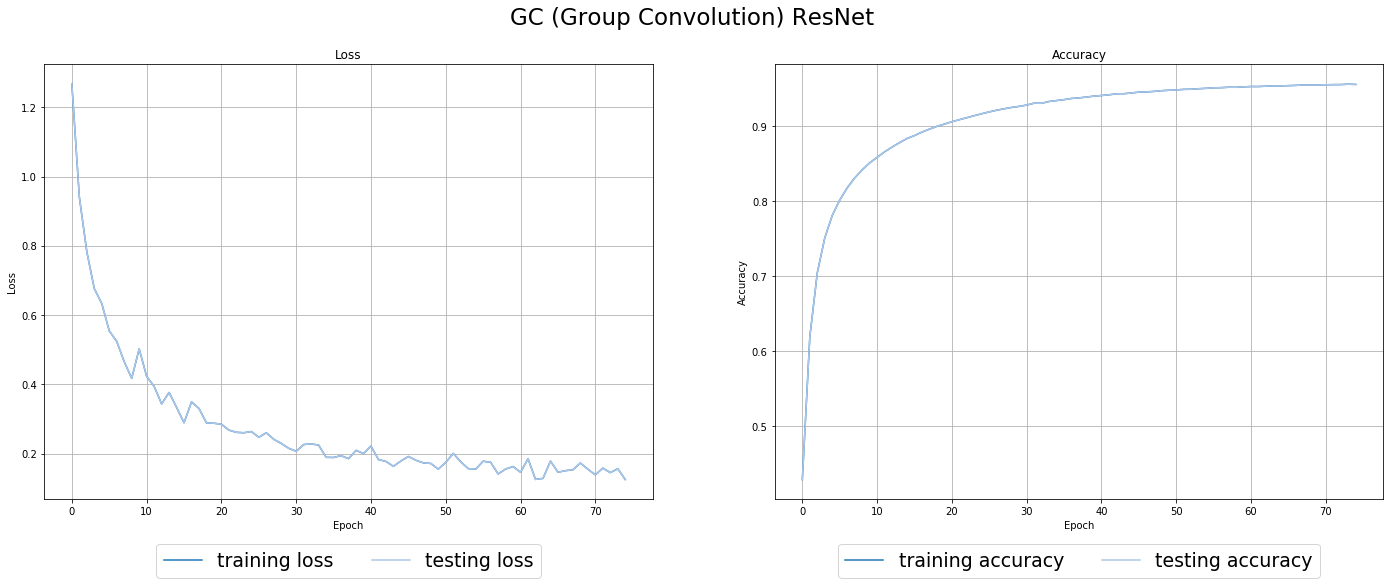

In [25]:
plotter.plot_values(train_loss, test_loss, train_acc, test_acc)

In [26]:
# print the final accuray
print(train[1][-1])

0.9558


In [27]:
# print the final accuracy
print(test[1][-1])

0.8840600000000001
